In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson
import warnings


In [7]:
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10
np.random.seed(42)

## 2. Завантаження та розвідковий аналіз даних (EDA)

На цьому етапі ми:
1. Завантажимо дані
2. Вивчимо структуру датасету
3. Перевіримо наявність пропущених значень
4. Проаналізуємо розподіл змінних

In [13]:
df = pd.read_csv('Data/Student_Performance.csv')
print("=" * 60)
print("📊 ОСНОВНА ІНФОРМАЦІЯ ПРО ДАТАСЕТ")
print("=" * 60)
print(f"Розмір датасету: {df.shape[0]} рядків × {df.shape[1]} стовпців")
print(f"\nТипи даних:")
print(df.dtypes.value_counts())

📊 ОСНОВНА ІНФОРМАЦІЯ ПРО ДАТАСЕТ
Розмір датасету: 10000 рядків × 6 стовпців

Типи даних:
int64      4
object     1
float64    1
Name: count, dtype: int64


In [14]:
print("\n" + "=" * 60)
print("📋 ДЕТАЛЬНА ІНФОРМАЦІЯ ПРО ЗМІННІ")
print("=" * 60)
df.info()


📋 ДЕТАЛЬНА ІНФОРМАЦІЯ ПРО ЗМІННІ
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [15]:
# Статистичний опис числових змінних
print("\n" + "=" * 60)
print("📈 СТАТИСТИЧНИЙ ОПИС ЧИСЛОВИХ ЗМІННИХ")
print("=" * 60)
df.describe()



📈 СТАТИСТИЧНИЙ ОПИС ЧИСЛОВИХ ЗМІННИХ


,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [17]:
# Перевірка на пропущені значення
print("\n" + "=" * 60)
print("АНАЛІЗ ПРОПУЩЕНИХ ЗНАЧЕНЬ")
print("=" * 60)

missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Пропущені значення': missing_values,
    'Відсоток': missing_percentage
})

if missing_values.sum() > 0:
    print(missing_df[missing_df['Пропущені значення'] > 0])
    
    # Візуалізація пропущених значень
    plt.figure(figsize=(10, 6))
    missing_df[missing_df['Пропущені значення'] > 0].plot(kind='bar')
    plt.title('Пропущені значення в датасеті')
    plt.xlabel('Змінні')
    plt.ylabel('Кількість пропущених значень')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("✅ Пропущених значень не виявлено!")


АНАЛІЗ ПРОПУЩЕНИХ ЗНАЧЕНЬ
✅ Пропущених значень не виявлено!


## 3. Візуалізація розподілу змінних

Проаналізуємо розподіл цільової змінної та основних предикторів

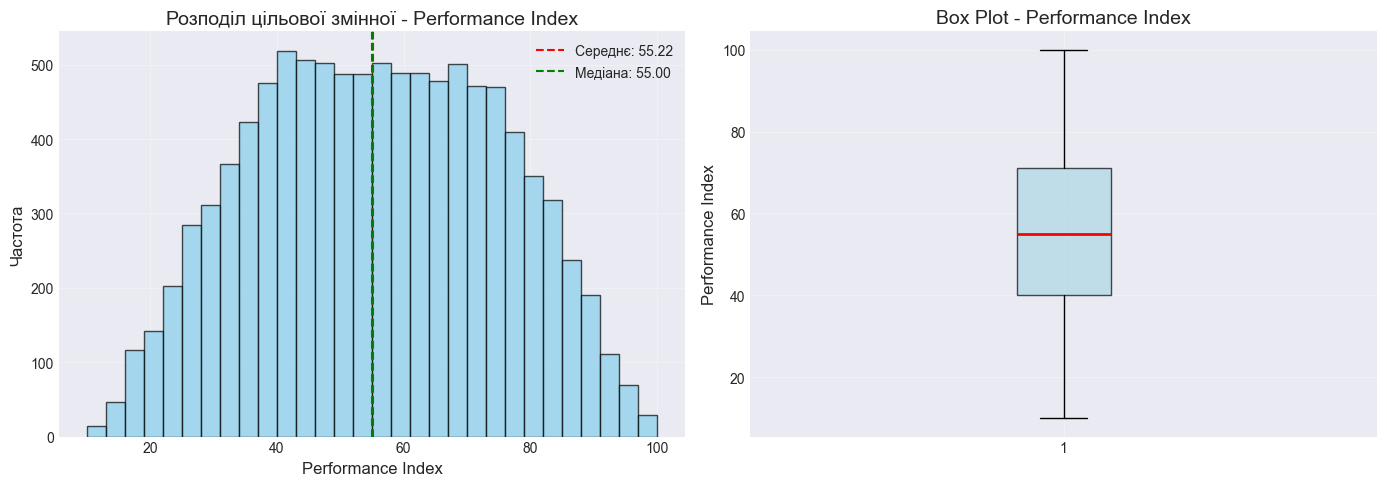

📊 Статистики цільової змінної:
   Середнє: 55.22
   Медіана: 55.00
   Стандартне відхилення: 19.21
   Асиметрія (Skewness): -0.002
   Ексцес (Kurtosis): -0.861


In [18]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Гістограма
axes[0].hist(df['Performance Index'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
axes[0].axvline(df['Performance Index'].mean(), color='red', linestyle='--', label=f'Середнє: {df["Performance Index"].mean():.2f}')
axes[0].axvline(df['Performance Index'].median(), color='green', linestyle='--', label=f'Медіана: {df["Performance Index"].median():.2f}')
axes[0].set_xlabel('Performance Index')
axes[0].set_ylabel('Частота')
axes[0].set_title('Розподіл цільової змінної - Performance Index')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Box plot
axes[1].boxplot(df['Performance Index'], vert=True, patch_artist=True,
                boxprops=dict(facecolor='lightblue', alpha=0.7),
                medianprops=dict(color='red', linewidth=2))
axes[1].set_ylabel('Performance Index')
axes[1].set_title('Box Plot - Performance Index')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Статистики розподілу
print(f"📊 Статистики цільової змінної:")
print(f"   Середнє: {df['Performance Index'].mean():.2f}")
print(f"   Медіана: {df['Performance Index'].median():.2f}")
print(f"   Стандартне відхилення: {df['Performance Index'].std():.2f}")
print(f"   Асиметрія (Skewness): {df['Performance Index'].skew():.3f}")
print(f"   Ексцес (Kurtosis): {df['Performance Index'].kurtosis():.3f}")

## 4. Аналіз кореляцій

Побудуємо теплову карту кореляцій для виявлення взаємозв'язків між змінними

In [19]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"📊 Числові змінні ({len(numeric_cols)}): {numeric_cols}")

📊 Числові змінні (5): ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index']


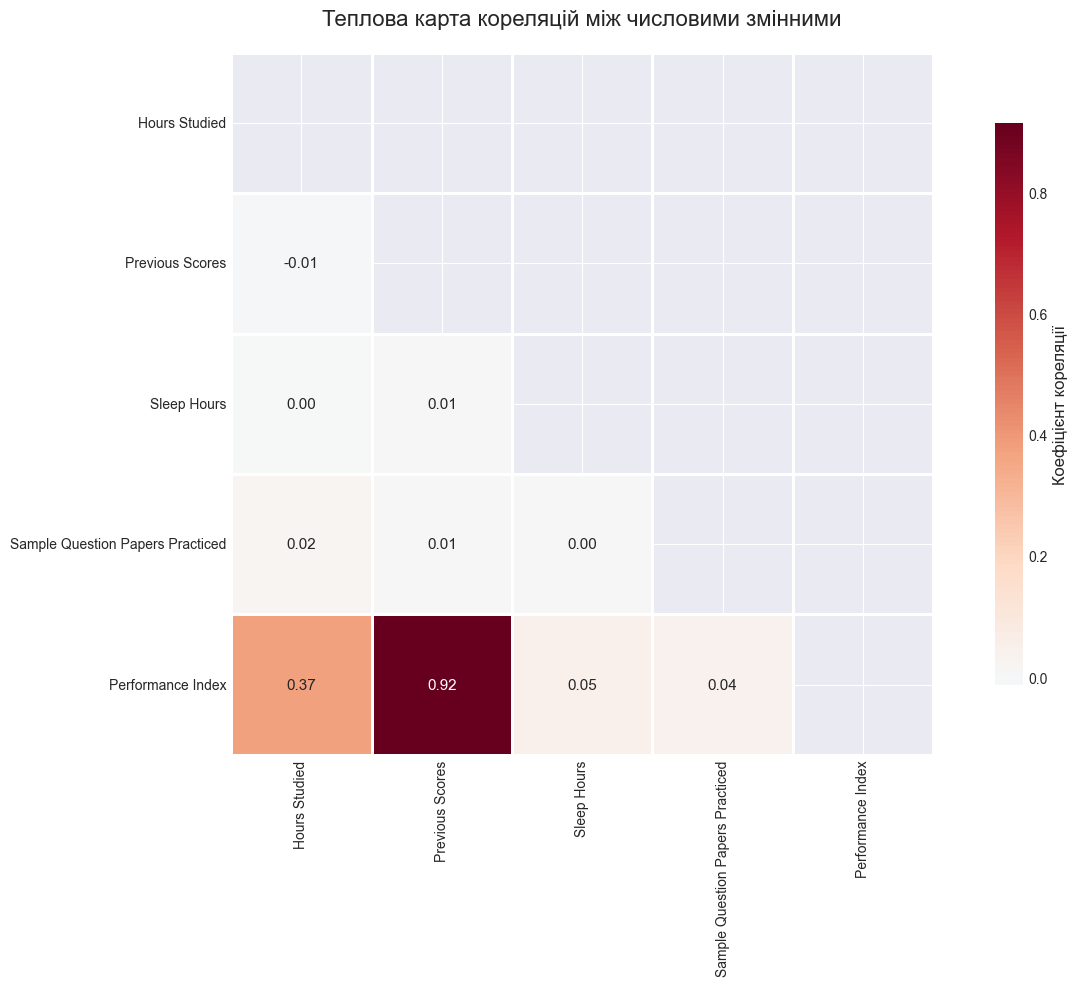

In [20]:
plt.figure(figsize=(14, 10))
correlation_matrix = df[numeric_cols].corr()

# Створення маски для верхнього трикутника
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Побудова теплової карти
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f', 
            cmap='RdBu_r', center=0, square=True, linewidths=1,
            cbar_kws={"shrink": 0.8, "label": "Коефіцієнт кореляції"})

plt.title('Теплова карта кореляцій між числовими змінними', fontsize=16, pad=20)
plt.tight_layout()
plt.show()


📊 КОРЕЛЯЦІЯ ПРЕДИКТОРІВ З PERFORMANCE INDEX


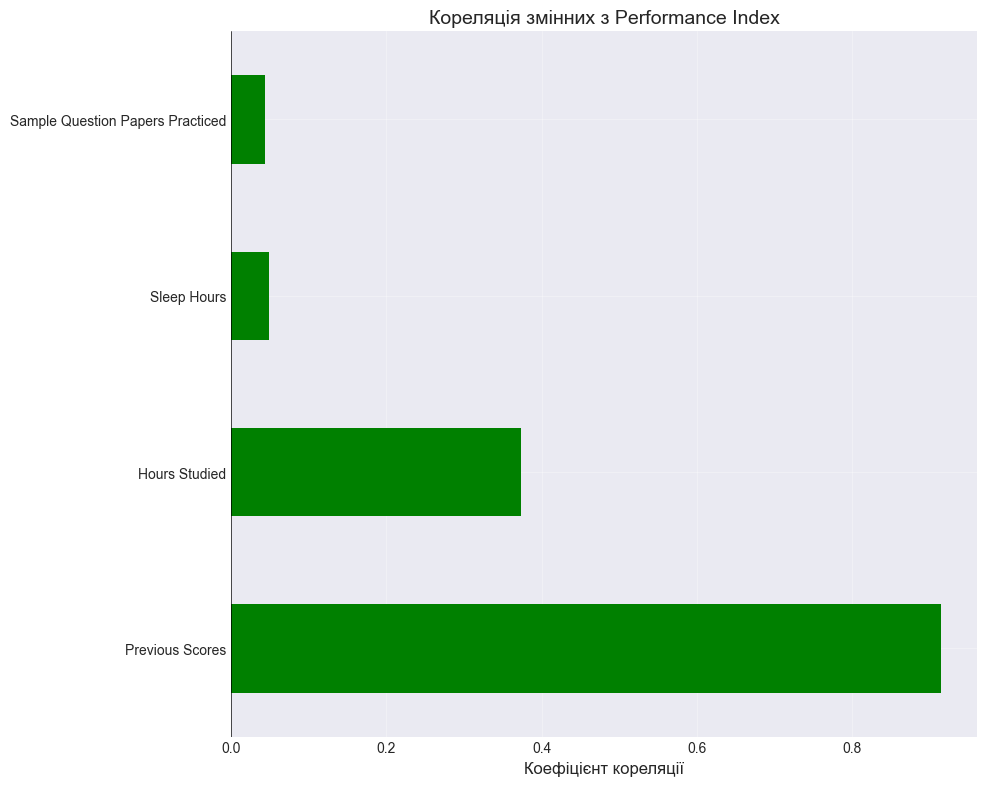

Performance Index                   1.000000
Previous Scores                     0.915189
Hours Studied                       0.373730
Sleep Hours                         0.048106
Sample Question Papers Practiced    0.043268
Name: Performance Index, dtype: float64


In [21]:
target_corr = correlation_matrix['Performance Index'].sort_values(ascending=False)
print("\n" + "=" * 60)
print("📊 КОРЕЛЯЦІЯ ПРЕДИКТОРІВ З PERFORMANCE INDEX")
print("=" * 60)

# Створення барплоту для візуалізації кореляцій
plt.figure(figsize=(10, 8))
colors = ['green' if x > 0 else 'red' for x in target_corr[1:]]
target_corr[1:].plot(kind='barh', color=colors)
plt.xlabel('Коефіцієнт кореляції')
plt.title('Кореляція змінних з Performance Index')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(target_corr)

## 5. Обробка категоріальних змінних

Закодуємо категоріальні змінні для подальшого використання в моделі

In [22]:
# Визначення категоріальних змінних
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"🔤 Категоріальні змінні ({len(categorical_cols)}): {categorical_cols}")

# Аналіз унікальних значень
print("\n📋 Унікальні значення категоріальних змінних:")
for col in categorical_cols:
    unique_vals = df[col].unique()
    print(f"   {col}: {unique_vals} (кількість: {len(unique_vals)})")

🔤 Категоріальні змінні (1): ['Extracurricular Activities']

📋 Унікальні значення категоріальних змінних:
   Extracurricular Activities: ['Yes' 'No'] (кількість: 2)


In [23]:
# Обробка категоріальних змінних
df_processed = df.copy()

# Словник для збереження маппінгів
encoding_mappings = {}

for col in categorical_cols:
    unique_values = df_processed[col].unique()
    
    if len(unique_values) == 2:
        # Бінарне кодування для змінних з двома значеннями
        if 'Yes' in unique_values and 'No' in unique_values:
            mapping = {'No': 0, 'Yes': 1}
        else:
            mapping = {unique_values[0]: 0, unique_values[1]: 1}
        
        df_processed[col] = df_processed[col].map(mapping)
        encoding_mappings[col] = mapping
        print(f"✅ {col}: застосовано бінарне кодування {mapping}")
    else:
        # One-hot encoding для змінних з більше ніж двома значеннями
        print(f"⚠️ {col}: має {len(unique_values)} унікальних значень - потребує one-hot encoding")
        # Для простоти використаємо pd.get_dummies
        dummies = pd.get_dummies(df_processed[col], prefix=col, drop_first=True)
        df_processed = pd.concat([df_processed, dummies], axis=1)
        df_processed.drop(col, axis=1, inplace=True)

print("\n📊 Розмір датасету після обробки:", df_processed.shape)

✅ Extracurricular Activities: застосовано бінарне кодування {'No': 0, 'Yes': 1}

📊 Розмір датасету після обробки: (10000, 6)


## 6. Підготовка даних для моделювання

Розділимо дані на ознаки (X) та цільову змінну (y), а потім на навчальну та тестову вибірки

In [24]:
# Визначення цільової змінної та ознак
target = 'Performance Index'
features = [col for col in df_processed.columns if col != target]

X = df_processed[features].values
y = df_processed[target].values

print(f"📊 Форма матриці ознак X: {X.shape}")
print(f"📊 Форма вектора цільової змінної y: {y.shape}")
print(f"\n📋 Використані ознаки ({len(features)}):")
for i, feature in enumerate(features, 1):
    print(f"   {i}. {feature}")

📊 Форма матриці ознак X: (10000, 5)
📊 Форма вектора цільової змінної y: (10000,)

📋 Використані ознаки (5):
   1. Hours Studied
   2. Previous Scores
   3. Extracurricular Activities
   4. Sleep Hours
   5. Sample Question Papers Practiced


In [25]:
# Розбиття на навчальну та тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"📊 Розмір навчальної вибірки: {X_train.shape[0]} зразків")
print(f"📊 Розмір тестової вибірки: {X_test.shape[0]} зразків")
print(f"📊 Співвідношення train/test: {X_train.shape[0]/X.shape[0]:.1%}/{X_test.shape[0]/X.shape[0]:.1%}")

📊 Розмір навчальної вибірки: 8000 зразків
📊 Розмір тестової вибірки: 2000 зразків
📊 Співвідношення train/test: 80.0%/20.0%


In [26]:
# Стандартизація ознак (КРИТИЧНО для градієнтного спуску!)
scaler = StandardScaler()

# Навчаємо scaler на навчальних даних
X_train_scaled = scaler.fit_transform(X_train)

# Трансформуємо тестові дані (без повторного навчання!)
X_test_scaled = scaler.transform(X_test)

print("✅ Дані стандартизовано")
print(f"   Середнє X_train_scaled: {X_train_scaled.mean():.6f} (має бути ≈ 0)")
print(f"   Std X_train_scaled: {X_train_scaled.std():.6f} (має бути ≈ 1)")

✅ Дані стандартизовано
   Середнє X_train_scaled: -0.000000 (має бути ≈ 0)
   Std X_train_scaled: 1.000000 (має бути ≈ 1)


In [27]:
# Додавання стовпця одиниць для intercept (β₀)
X_train_final = np.c_[np.ones(X_train_scaled.shape[0]), X_train_scaled]
X_test_final = np.c_[np.ones(X_test_scaled.shape[0]), X_test_scaled]

print(f"\n📊 Фінальні розміри:")
print(f"   X_train_final: {X_train_final.shape}")
print(f"   X_test_final: {X_test_final.shape}")
print(f"   Кількість параметрів моделі: {X_train_final.shape[1]} (включаючи β₀)")


📊 Фінальні розміри:
   X_train_final: (8000, 6)
   X_test_final: (2000, 6)
   Кількість параметрів моделі: 6 (включаючи β₀)


## 7. Реалізація градієнтного спуску

### Математичні формули:

**Функція втрат (MSE):**
$$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

**Градієнт:**
$$\frac{\partial MSE}{\partial \beta_j} = -\frac{2}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i) \cdot x_{ij}$$

**Оновлення параметрів:**
$$\beta_j^{new} = \beta_j^{old} - \alpha \cdot \frac{\partial MSE}{\partial \beta_j}$$

де $\alpha$ - швидкість навчання (learning rate)

In [28]:
def compute_cost(X, y, beta):
    """
    Обчислення функції втрат (MSE)
    
    Параметри:
    ----------
    X : numpy array, форма (n_samples, n_features)
        Матриця ознак з доданим стовпцем одиниць
    y : numpy array, форма (n_samples,)
        Вектор цільових значень
    beta : numpy array, форма (n_features,)
        Вектор параметрів моделі
    
    Повертає:
    ---------
    mse : float
        Значення середньої квадратичної помилки
    """
    n = len(y)
    predictions = X.dot(beta)
    errors = predictions - y
    mse = (1 / n) * np.sum(errors ** 2)
    return mse

In [29]:
def gradient_descent(X, y, beta, learning_rate, epochs, verbose=True):
    """
    Реалізація методу градієнтного спуску для лінійної регресії
    
    Параметри:
    ----------
    X : numpy array, форма (n_samples, n_features)
        Матриця ознак з доданим стовпцем одиниць
    y : numpy array, форма (n_samples,)
        Вектор цільових значень
    beta : numpy array, форма (n_features,)
        Початкові значення параметрів
    learning_rate : float
        Швидкість навчання
    epochs : int
        Кількість ітерацій
    verbose : bool
        Чи виводити прогрес навчання
    
    Повертає:
    ---------
    beta : numpy array
        Оптимізовані параметри моделі
    cost_history : list
        Історія значень функції втрат
    """
    cost_history = []
    m = len(y)
    
    for epoch in range(epochs):
        # Обчислення передбачень
        predictions = X.dot(beta)
        
        # Обчислення помилки
        errors = predictions - y
        
        # Обчислення градієнта (похідна MSE за beta)
        gradient = (2 / m) * X.T.dot(errors)
        
        # Оновлення ваг
        beta = beta - learning_rate * gradient
        
        # Збереження поточного MSE для історії
        current_cost = compute_cost(X, y, beta)
        cost_history.append(current_cost)
        
        # Виведення прогресу кожні 100 ітерацій
        if verbose and (epoch + 1) % 100 == 0:
            print(f"   Епоха {epoch + 1}/{epochs}: MSE = {current_cost:.6f}")
    
    return beta, cost_history

In [30]:
n_features = X_train_final.shape[1]
beta_initial = np.zeros(n_features)  # Починаємо з нулів

# Гіперпараметри
learning_rate = 0.01
epochs = 1000

print("🚀 Параметри градієнтного спуску:")
print(f"   Швидкість навчання (α): {learning_rate}")
print(f"   Кількість епох: {epochs}")
print(f"   Кількість параметрів: {n_features}")
print(f"\n📈 Початкова MSE: {compute_cost(X_train_final, y_train, beta_initial):.6f}")

🚀 Параметри градієнтного спуску:
   Швидкість навчання (α): 0.01
   Кількість епох: 1000
   Кількість параметрів: 6

📈 Початкова MSE: 3428.035000


In [31]:
print("\n" + "=" * 60)
print("🎯 НАВЧАННЯ МОДЕЛІ")
print("=" * 60)

beta_final, cost_history = gradient_descent(
    X_train_final, y_train, beta_initial, 
    learning_rate, epochs, verbose=True
)

print(f"\n✅ Навчання завершено!")
print(f"   Фінальна MSE на навчальній вибірці: {cost_history[-1]:.6f}")


🎯 НАВЧАННЯ МОДЕЛІ
   Епоха 100/1000: MSE = 64.570374
   Епоха 200/1000: MSE = 5.235959
   Епоха 300/1000: MSE = 4.188571
   Епоха 400/1000: MSE = 4.170069
   Епоха 500/1000: MSE = 4.169742
   Епоха 600/1000: MSE = 4.169736
   Епоха 700/1000: MSE = 4.169736
   Епоха 800/1000: MSE = 4.169736
   Епоха 900/1000: MSE = 4.169736
   Епоха 1000/1000: MSE = 4.169736

✅ Навчання завершено!
   Фінальна MSE на навчальній вибірці: 4.169736


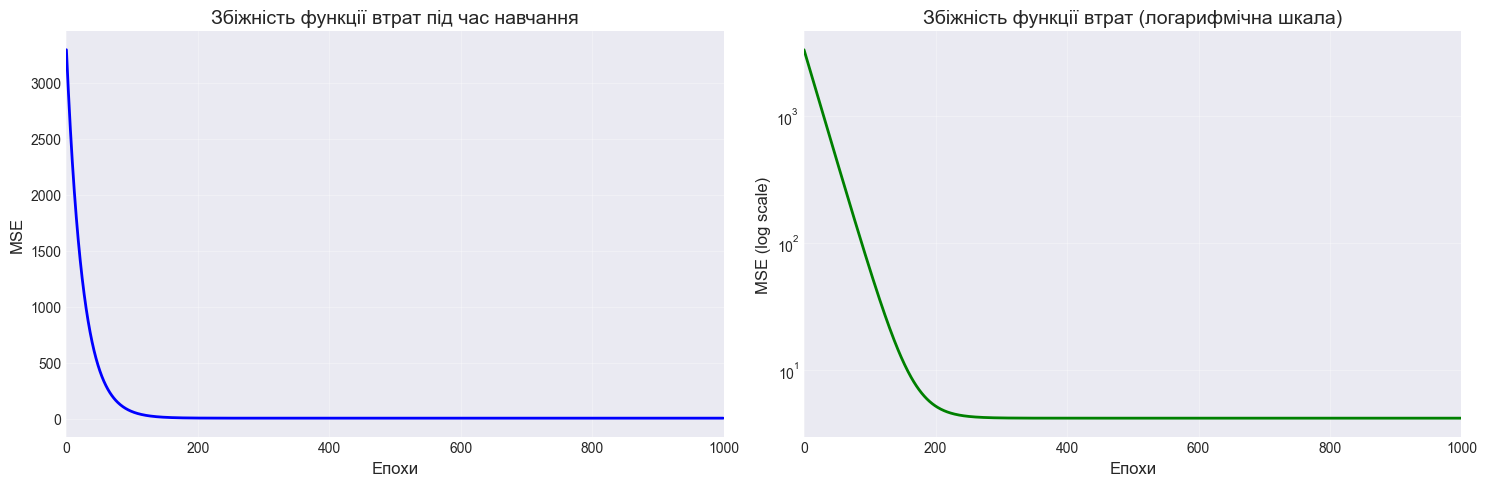


📊 Аналіз збіжності:
   Початкова MSE: 3292.539047
   Фінальна MSE: 4.169736
   Зменшення MSE: 99.87%
   MSE на останніх 10 епохах: 4.169736 ± 0.000000


In [32]:
# Візуалізація процесу навчання
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Графік збіжності функції втрат
axes[0].plot(cost_history, linewidth=2, color='blue')
axes[0].set_xlabel('Епохи')
axes[0].set_ylabel('MSE')
axes[0].set_title('Збіжність функції втрат під час навчання')
axes[0].grid(True, alpha=0.3)
axes[0].set_xlim([0, epochs])

# Логарифмічна шкала для кращої візуалізації
axes[1].semilogy(cost_history, linewidth=2, color='green')
axes[1].set_xlabel('Епохи')
axes[1].set_ylabel('MSE (log scale)')
axes[1].set_title('Збіжність функції втрат (логарифмічна шкала)')
axes[1].grid(True, alpha=0.3)
axes[1].set_xlim([0, epochs])

plt.tight_layout()
plt.show()

# Аналіз збіжності
print(f"\n📊 Аналіз збіжності:")
print(f"   Початкова MSE: {cost_history[0]:.6f}")
print(f"   Фінальна MSE: {cost_history[-1]:.6f}")
print(f"   Зменшення MSE: {(1 - cost_history[-1]/cost_history[0])*100:.2f}%")
print(f"   MSE на останніх 10 епохах: {np.mean(cost_history[-10:]):.6f} ± {np.std(cost_history[-10:]):.6f}")

## 8. Аналіз отриманих коефіцієнтів

📊 КОЕФІЦІЄНТИ МОДЕЛІ

β₀ (intercept): 55.311500

Коефіцієнти для ознак:
                          Ознака  Коефіцієнт  Абс. значення
                       Intercept   55.311500      55.311500
                 Previous Scores   17.637271      17.637271
                   Hours Studied    7.401341       7.401341
                     Sleep Hours    0.810031       0.810031
Sample Question Papers Practiced    0.548842       0.548842
      Extracurricular Activities    0.304291       0.304291


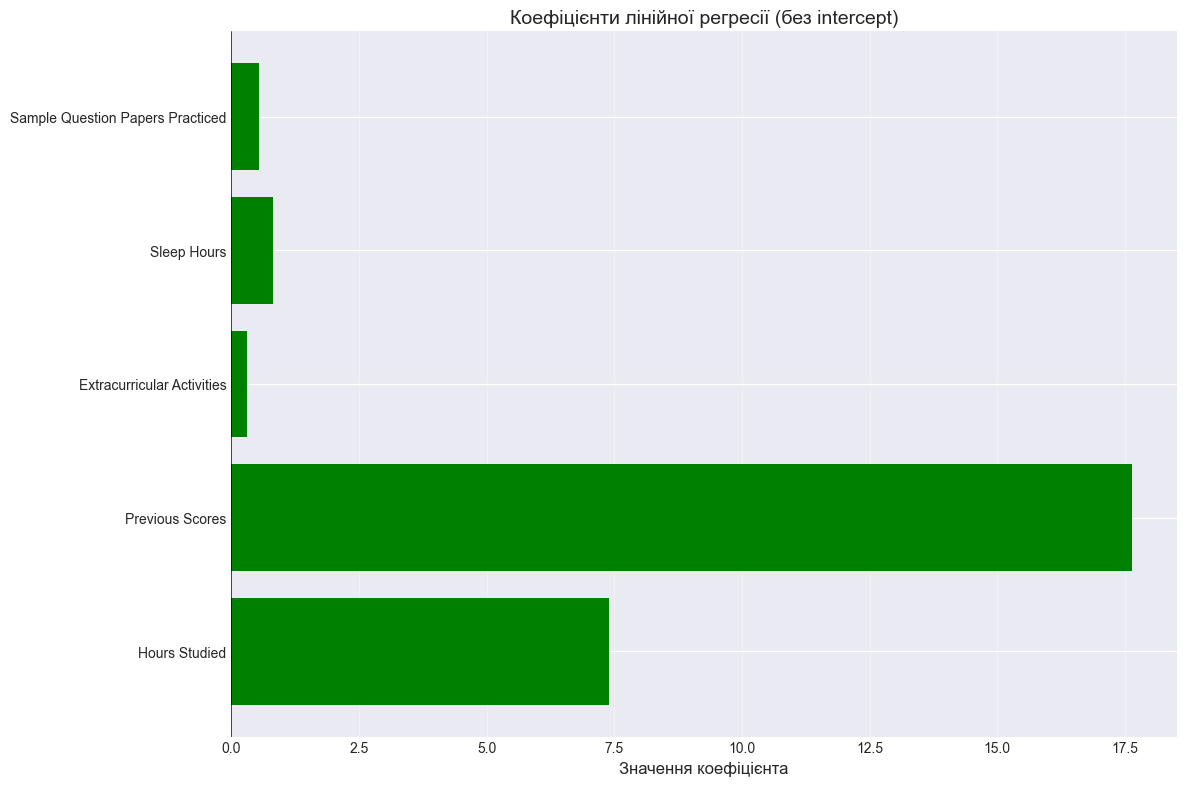

In [33]:
# Виведення коефіцієнтів моделі
print("=" * 60)
print("📊 КОЕФІЦІЄНТИ МОДЕЛІ")
print("=" * 60)
print(f"\nβ₀ (intercept): {beta_final[0]:.6f}")
print("\nКоефіцієнти для ознак:")

# Створення DataFrame для зручного відображення
coefficients_df = pd.DataFrame({
    'Ознака': ['Intercept'] + features,
    'Коефіцієнт': beta_final,
    'Абс. значення': np.abs(beta_final)
})
coefficients_df = coefficients_df.sort_values('Абс. значення', ascending=False)

print(coefficients_df.to_string(index=False))

# Візуалізація коефіцієнтів
plt.figure(figsize=(12, 8))
indices = range(1, len(features) + 1)
plt.barh(indices, beta_final[1:], color=['green' if x > 0 else 'red' for x in beta_final[1:]])
plt.yticks(indices, features)
plt.xlabel('Значення коефіцієнта')
plt.title('Коефіцієнти лінійної регресії (без intercept)')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

## 9. Оцінка якості моделі на тестових даних

In [34]:
# Функція для розрахунку метрик
def calculate_metrics(y_true, y_pred):
    """
    Розрахунок метрик якості регресії
    
    Повертає: MSE, RMSE, MAE, R²
    """
    n = len(y_true)
    
    # MSE - Mean Squared Error
    mse = np.mean((y_true - y_pred) ** 2)
    
    # RMSE - Root Mean Squared Error
    rmse = np.sqrt(mse)
    
    # MAE - Mean Absolute Error
    mae = np.mean(np.abs(y_true - y_pred))
    
    # R² Score
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    
    return mse, rmse, mae, r2

In [35]:
# Прогнозування на тестовій вибірці
y_pred_test = X_test_final.dot(beta_final)
y_pred_train = X_train_final.dot(beta_final)

# Розрахунок метрик
mse_train, rmse_train, mae_train, r2_train = calculate_metrics(y_train, y_pred_train)
mse_test, rmse_test, mae_test, r2_test = calculate_metrics(y_test, y_pred_test)

print("=" * 60)
print("📊 МЕТРИКИ ЯКОСТІ МОДЕЛІ")
print("=" * 60)
print("\n📈 Навчальна вибірка:")
print(f"   MSE:  {mse_train:.6f}")
print(f"   RMSE: {rmse_train:.6f}")
print(f"   MAE:  {mae_train:.6f}")
print(f"   R²:   {r2_train:.6f}")

print("\n📈 Тестова вибірка:")
print(f"   MSE:  {mse_test:.6f}")
print(f"   RMSE: {rmse_test:.6f}")
print(f"   MAE:  {mae_test:.6f}")
print(f"   R²:   {r2_test:.6f}")

# Перевірка на перенавчання
overfitting_check = abs(r2_train - r2_test)
print(f"\n🔍 Різниця R² (train - test): {overfitting_check:.6f}")
if overfitting_check < 0.05:
    print("   ✅ Ознак перенавчання не виявлено")
elif overfitting_check < 0.1:
    print("   ⚠️ Можливе незначне перенавчання")
else:
    print("   ❌ Виявлено ознаки перенавчання")

📊 МЕТРИКИ ЯКОСТІ МОДЕЛІ

📈 Навчальна вибірка:
   MSE:  4.169736
   RMSE: 2.041993
   MAE:  1.619305
   R²:   0.988690

📈 Тестова вибірка:
   MSE:  4.082628
   RMSE: 2.020552
   MAE:  1.611121
   R²:   0.988983

🔍 Різниця R² (train - test): 0.000293
   ✅ Ознак перенавчання не виявлено


In [36]:
# Порівняння з базовою моделлю (baseline)
baseline_pred = np.full_like(y_test, np.mean(y_train))
mse_baseline, rmse_baseline, mae_baseline, r2_baseline = calculate_metrics(y_test, baseline_pred)

print("\n" + "=" * 60)
print("📊 ПОРІВНЯННЯ З БАЗОВОЮ МОДЕЛЛЮ")
print("=" * 60)
print("Базова модель: завжди передбачає середнє значення з навчальної вибірки")
print(f"\n📈 Метрики базової моделі:")
print(f"   MSE:  {mse_baseline:.6f}")
print(f"   RMSE: {rmse_baseline:.6f}")
print(f"   MAE:  {mae_baseline:.6f}")
print(f"   R²:   {r2_baseline:.6f}")

print(f"\n📊 Покращення відносно базової моделі:")
print(f"   MSE:  {((mse_baseline - mse_test) / mse_baseline * 100):.2f}%")
print(f"   RMSE: {((rmse_baseline - rmse_test) / rmse_baseline * 100):.2f}%")
print(f"   MAE:  {((mae_baseline - mae_test) / mae_baseline * 100):.2f}%")


📊 ПОРІВНЯННЯ З БАЗОВОЮ МОДЕЛЛЮ
Базова модель: завжди передбачає середнє значення з навчальної вибірки

📈 Метрики базової моделі:
   MSE:  370.773038
   RMSE: 19.255468
   MAE:  16.214722
   R²:   -0.000507

📊 Покращення відносно базової моделі:
   MSE:  98.90%
   RMSE: 89.51%
   MAE:  90.06%


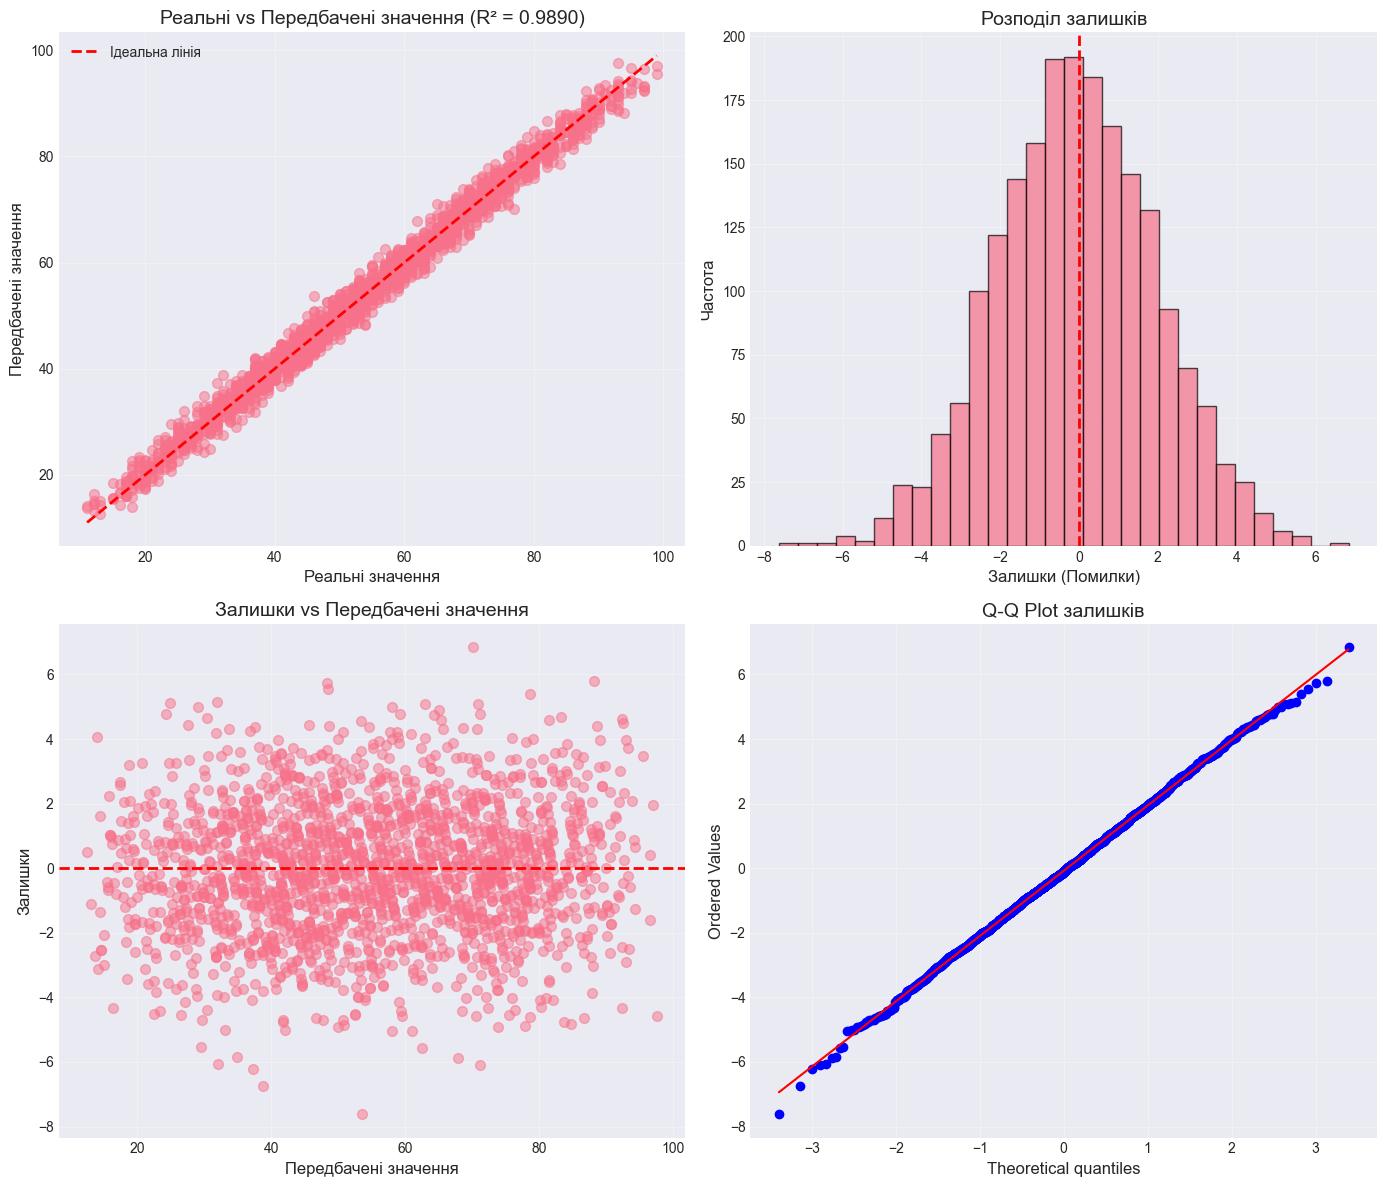

In [38]:
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# 1. Scatter plot: Реальні vs Передбачені значення
axes[0, 0].scatter(y_test, y_pred_test, alpha=0.5, s=50)
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
                'r--', lw=2, label='Ідеальна лінія')
axes[0, 0].set_xlabel('Реальні значення')
axes[0, 0].set_ylabel('Передбачені значення')
axes[0, 0].set_title(f'Реальні vs Передбачені значення (R² = {r2_test:.4f})')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Розподіл помилок
residuals_test = y_test - y_pred_test
axes[0, 1].hist(residuals_test, bins=30, edgecolor='black', alpha=0.7)
axes[0, 1].axvline(x=0, color='red', linestyle='--', linewidth=2)
axes[0, 1].set_xlabel('Залишки (Помилки)')
axes[0, 1].set_ylabel('Частота')
axes[0, 1].set_title('Розподіл залишків')
axes[0, 1].grid(True, alpha=0.3)

# 3. Залишки vs Передбачені значення
axes[1, 0].scatter(y_pred_test, residuals_test, alpha=0.5, s=50)
axes[1, 0].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[1, 0].set_xlabel('Передбачені значення')
axes[1, 0].set_ylabel('Залишки')
axes[1, 0].set_title('Залишки vs Передбачені значення')
axes[1, 0].grid(True, alpha=0.3)

# 4. Q-Q plot для перевірки нормальності залишків
stats.probplot(residuals_test, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot залишків')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 10. Перевірка класичних припущень лінійної регресії

Для коректності моделі лінійної регресії повинні виконуватися 6 класичних припущень:

1. **Лінійність зв'язку**
2. **Відсутність мультиколінеарності**
3. **Нормальність залишків**
4. **Гомоскедастичність**
5. **Відсутність автокореляції**
6. **Відсутність викидів та впливових спостережень**

### 10.1. Припущення 1: Лінійність зв'язку

Залишки повинні випадково розподілятися навколо нуля без систематичних паттернів

📊 ПРИПУЩЕННЯ 1: ЛІНІЙНІСТЬ ЗВ'ЯЗКУ


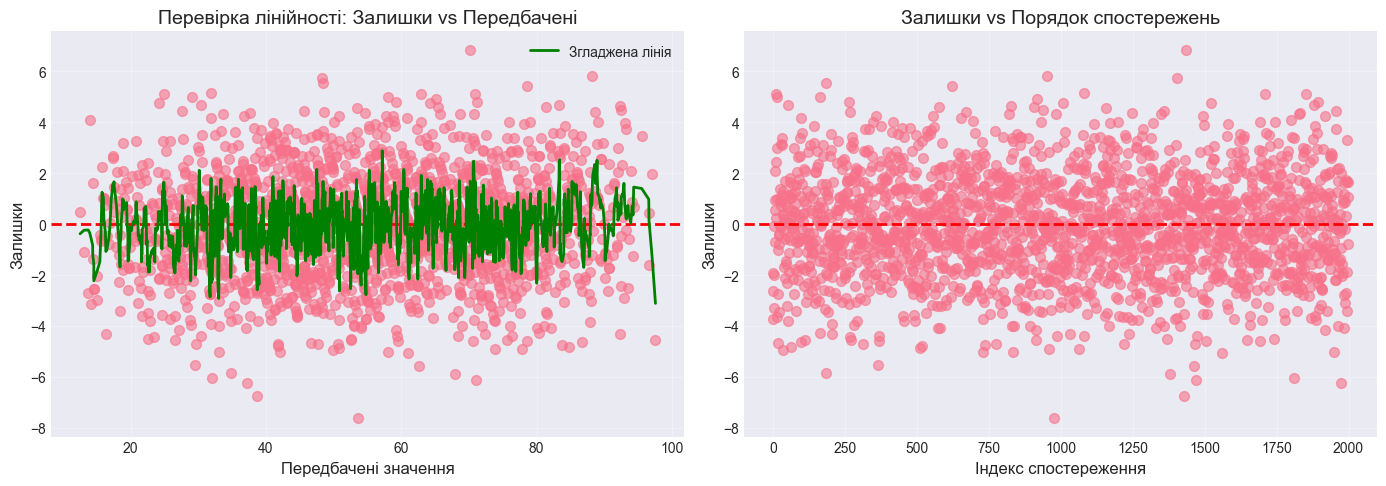


📈 Середнє значення залишків: -0.079784
   ⚠️ Залишки можуть мати систематичне зміщення

📊 Середні залишки по квартилях передбачень:
   Q1: -0.261457
   Q2: -0.156391
   Q3: 0.116667
   Q4: -0.017955

✅ Припущення про лінійність виконується


In [39]:
print("=" * 60)
print("📊 ПРИПУЩЕННЯ 1: ЛІНІЙНІСТЬ ЗВ'ЯЗКУ")
print("=" * 60)

# Візуалізація залишків
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Залишки vs передбачені значення
axes[0].scatter(y_pred_test, residuals_test, alpha=0.6, s=50)
axes[0].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[0].set_xlabel('Передбачені значення')
axes[0].set_ylabel('Залишки')
axes[0].set_title('Перевірка лінійності: Залишки vs Передбачені')
axes[0].grid(True, alpha=0.3)

# Додамо LOWESS згладжування для виявлення паттернів
from scipy.signal import savgol_filter
sorted_indices = np.argsort(y_pred_test)
axes[0].plot(y_pred_test[sorted_indices], 
            savgol_filter(residuals_test[sorted_indices], 11, 3),
            color='green', linewidth=2, label='Згладжена лінія')
axes[0].legend()

# Залишки vs індекс спостереження
axes[1].scatter(range(len(residuals_test)), residuals_test, alpha=0.6, s=50)
axes[1].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[1].set_xlabel('Індекс спостереження')
axes[1].set_ylabel('Залишки')
axes[1].set_title('Залишки vs Порядок спостережень')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Аналіз результатів
mean_residuals = np.mean(residuals_test)
print(f"\n📈 Середнє значення залишків: {mean_residuals:.6f}")
if abs(mean_residuals) < 0.01:
    print("   ✅ Залишки центровані навколо нуля")
else:
    print("   ⚠️ Залишки можуть мати систематичне зміщення")

# Перевірка на наявність нелінійних паттернів
# Розділимо діапазон передбачень на квантилі та перевіримо середні залишки
quantiles = np.percentile(y_pred_test, [25, 50, 75])
q1_residuals = residuals_test[y_pred_test <= quantiles[0]]
q2_residuals = residuals_test[(y_pred_test > quantiles[0]) & (y_pred_test <= quantiles[1])]
q3_residuals = residuals_test[(y_pred_test > quantiles[1]) & (y_pred_test <= quantiles[2])]
q4_residuals = residuals_test[y_pred_test > quantiles[2]]

print(f"\n📊 Середні залишки по квартилях передбачень:")
print(f"   Q1: {np.mean(q1_residuals):.6f}")
print(f"   Q2: {np.mean(q2_residuals):.6f}")
print(f"   Q3: {np.mean(q3_residuals):.6f}")
print(f"   Q4: {np.mean(q4_residuals):.6f}")

# Висновок
if max(abs(np.mean(q1_residuals)), abs(np.mean(q2_residuals)), 
       abs(np.mean(q3_residuals)), abs(np.mean(q4_residuals))) < 1:
    print("\n✅ Припущення про лінійність виконується")
else:
    print("\n❌ Виявлено порушення припущення про лінійність")

### 10.2. Припущення 2: Відсутність мультиколінеарності

Предиктори не повинні бути сильно корельовані між собою. Використаємо VIF (Variance Inflation Factor)

📊 ПРИПУЩЕННЯ 2: ВІДСУТНІСТЬ МУЛЬТИКОЛІНЕАРНОСТІ

📊 Variance Inflation Factor (VIF) для кожної ознаки:
                          Ознака      VIF
                     Sleep Hours 1.000461
      Extracurricular Activities 1.000428
                   Hours Studied 1.000387
Sample Question Papers Practiced 1.000320
                 Previous Scores 1.000243


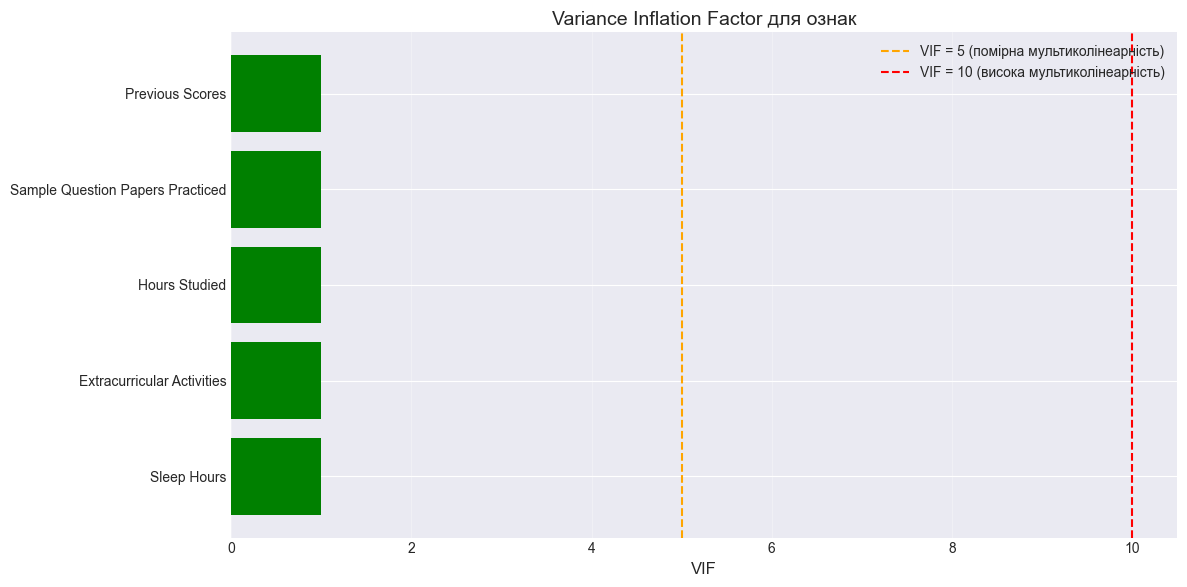


📈 Аналіз мультиколінеарності:
   Ознаки з високою мультиколінеарністю (VIF > 10): 0
   Ознаки з помірною мультиколінеарністю (5 < VIF <= 10): 0

✅ Припущення про відсутність мультиколінеарності виконується


In [40]:
print("=" * 60)
print("📊 ПРИПУЩЕННЯ 2: ВІДСУТНІСТЬ МУЛЬТИКОЛІНЕАРНОСТІ")
print("=" * 60)

# Розрахунок VIF для кожної ознаки
def calculate_vif(X, feature_names):
    vif_data = pd.DataFrame()
    vif_data["Ознака"] = feature_names
    vif_data["VIF"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
    return vif_data

# Обчислюємо VIF (без стовпця одиниць!)
vif_df = calculate_vif(X_train_scaled, features)
vif_df = vif_df.sort_values('VIF', ascending=False)

print("\n📊 Variance Inflation Factor (VIF) для кожної ознаки:")
print(vif_df.to_string(index=False))

# Візуалізація VIF
plt.figure(figsize=(12, 6))
colors = ['red' if x > 10 else 'orange' if x > 5 else 'green' for x in vif_df['VIF']]
plt.barh(range(len(vif_df)), vif_df['VIF'], color=colors)
plt.yticks(range(len(vif_df)), vif_df['Ознака'])
plt.xlabel('VIF')
plt.title('Variance Inflation Factor для ознак')
plt.axvline(x=5, color='orange', linestyle='--', label='VIF = 5 (помірна мультиколінеарність)')
plt.axvline(x=10, color='red', linestyle='--', label='VIF = 10 (висока мультиколінеарність)')
plt.legend()
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

# Аналіз результатів
high_vif = vif_df[vif_df['VIF'] > 10]
moderate_vif = vif_df[(vif_df['VIF'] > 5) & (vif_df['VIF'] <= 10)]

print(f"\n📈 Аналіз мультиколінеарності:")
print(f"   Ознаки з високою мультиколінеарністю (VIF > 10): {len(high_vif)}")
if len(high_vif) > 0:
    print(f"   {list(high_vif['Ознака'].values)}")
    
print(f"   Ознаки з помірною мультиколінеарністю (5 < VIF <= 10): {len(moderate_vif)}")
if len(moderate_vif) > 0:
    print(f"   {list(moderate_vif['Ознака'].values)}")

# Висновок
if len(high_vif) == 0:
    print("\n✅ Припущення про відсутність мультиколінеарності виконується")
elif len(high_vif) <= 2:
    print("\n⚠️ Виявлено помірну мультиколінеарність - модель може бути нестабільною")
else:
    print("\n❌ Виявлено серйозну мультиколінеарність - рекомендується видалити корельовані ознаки")

### 10.3. Припущення 3: Нормальність залишків

Залишки повинні мати нормальний розподіл

📊 ПРИПУЩЕННЯ 3: НОРМАЛЬНІСТЬ ЗАЛИШКІВ


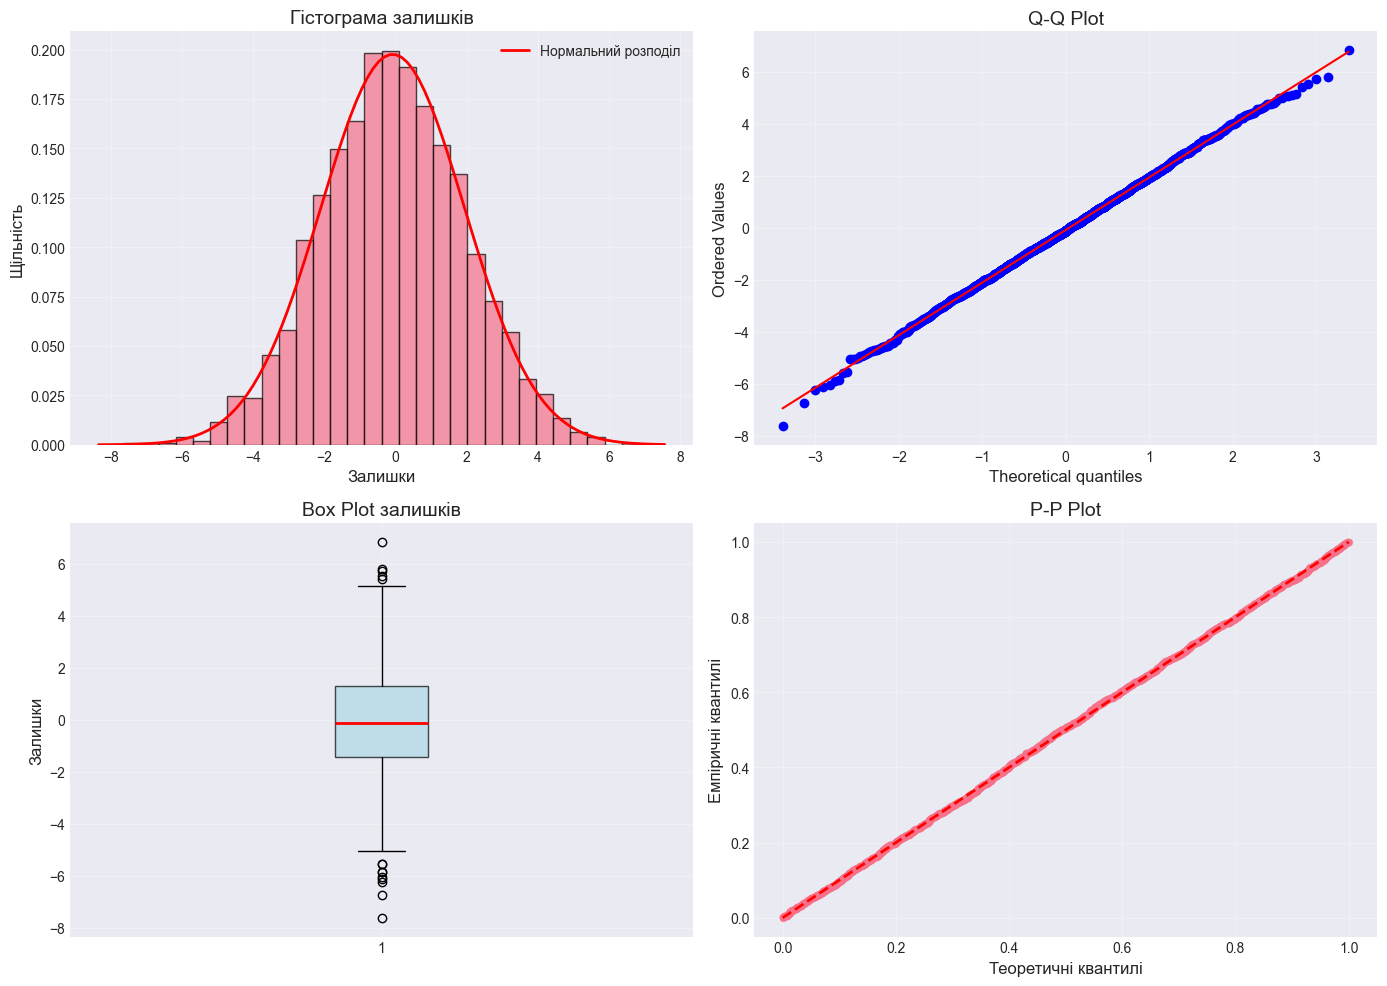


📈 Статистичні тести на нормальність:

1. Shapiro-Wilk тест:
   Статистика: 0.999610
   p-value: 0.975150
   Висновок: ✅ Нормальний розподіл (p > 0.05)

2. Jarque-Bera тест:
   Статистика: 0.085157
   p-value: 0.958315
   Висновок: ✅ Нормальний розподіл (p > 0.05)

3. Anderson-Darling тест:
   Статистика: 0.139467
   Критичні значення: [0.575 0.655 0.785 0.916 1.09 ]
   Рівні значущості: [15.  10.   5.   2.5  1. ]
   Висновок: ✅ Нормальний розподіл

📊 Описові статистики залишків:
   Середнє: -0.079784
   Стандартне відхилення: 2.018976
   Асиметрія (Skewness): -0.014352
   Ексцес (Kurtosis): -0.014070

✅ Припущення про нормальність залишків виконується


In [41]:
print("=" * 60)
print("📊 ПРИПУЩЕННЯ 3: НОРМАЛЬНІСТЬ ЗАЛИШКІВ")
print("=" * 60)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Гістограма залишків з нормальною кривою
axes[0, 0].hist(residuals_test, bins=30, density=True, alpha=0.7, edgecolor='black')
mu, std = residuals_test.mean(), residuals_test.std()
xmin, xmax = axes[0, 0].get_xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
axes[0, 0].plot(x, p, 'r-', linewidth=2, label='Нормальний розподіл')
axes[0, 0].set_xlabel('Залишки')
axes[0, 0].set_ylabel('Щільність')
axes[0, 0].set_title('Гістограма залишків')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Q-Q plot
stats.probplot(residuals_test, dist="norm", plot=axes[0, 1])
axes[0, 1].set_title('Q-Q Plot')
axes[0, 1].grid(True, alpha=0.3)

# 3. Box plot залишків
axes[1, 0].boxplot(residuals_test, vert=True, patch_artist=True,
                   boxprops=dict(facecolor='lightblue', alpha=0.7),
                   medianprops=dict(color='red', linewidth=2))
axes[1, 0].set_ylabel('Залишки')
axes[1, 0].set_title('Box Plot залишків')
axes[1, 0].grid(True, alpha=0.3)

# 4. P-P plot
sorted_residuals = np.sort(residuals_test)
n = len(sorted_residuals)
theoretical_quantiles = stats.norm.cdf(sorted_residuals, mu, std)
empirical_quantiles = np.arange(1, n + 1) / n
axes[1, 1].scatter(theoretical_quantiles, empirical_quantiles, alpha=0.6, s=20)
axes[1, 1].plot([0, 1], [0, 1], 'r--', linewidth=2)
axes[1, 1].set_xlabel('Теоретичні квантилі')
axes[1, 1].set_ylabel('Емпіричні квантилі')
axes[1, 1].set_title('P-P Plot')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Статистичні тести на нормальність
print("\n📈 Статистичні тести на нормальність:")

# 1. Shapiro-Wilk тест
shapiro_stat, shapiro_p = stats.shapiro(residuals_test)
print(f"\n1. Shapiro-Wilk тест:")
print(f"   Статистика: {shapiro_stat:.6f}")
print(f"   p-value: {shapiro_p:.6f}")
print(f"   Висновок: {'✅ Нормальний розподіл (p > 0.05)' if shapiro_p > 0.05 else '❌ Не нормальний розподіл (p <= 0.05)'}")

# 2. Jarque-Bera тест
jb_stat, jb_p = stats.jarque_bera(residuals_test)
print(f"\n2. Jarque-Bera тест:")
print(f"   Статистика: {jb_stat:.6f}")
print(f"   p-value: {jb_p:.6f}")
print(f"   Висновок: {'✅ Нормальний розподіл (p > 0.05)' if jb_p > 0.05 else '❌ Не нормальний розподіл (p <= 0.05)'}")

# 3. Anderson-Darling тест
ad_result = stats.anderson(residuals_test, dist='norm')
print(f"\n3. Anderson-Darling тест:")
print(f"   Статистика: {ad_result.statistic:.6f}")
print(f"   Критичні значення: {ad_result.critical_values}")
print(f"   Рівні значущості: {ad_result.significance_level}")
if ad_result.statistic < ad_result.critical_values[2]:  # 5% рівень
    print(f"   Висновок: ✅ Нормальний розподіл")
else:
    print(f"   Висновок: ❌ Не нормальний розподіл")

# Описові статистики
print(f"\n📊 Описові статистики залишків:")
print(f"   Середнє: {mu:.6f}")
print(f"   Стандартне відхилення: {std:.6f}")
print(f"   Асиметрія (Skewness): {stats.skew(residuals_test):.6f}")
print(f"   Ексцес (Kurtosis): {stats.kurtosis(residuals_test):.6f}")

# Загальний висновок
if shapiro_p > 0.05 and jb_p > 0.05:
    print("\n✅ Припущення про нормальність залишків виконується")
elif shapiro_p > 0.01 or jb_p > 0.01:
    print("\n⚠️ Є незначні відхилення від нормальності")
else:
    print("\n❌ Припущення про нормальність залишків порушено")

### 10.4. Припущення 4: Гомоскедастичність (постійна дисперсія залишків)

Дисперсія залишків повинна бути постійною для всіх рівнів передбачень

📊 ПРИПУЩЕННЯ 4: ГОМОСКЕДАСТИЧНІСТЬ


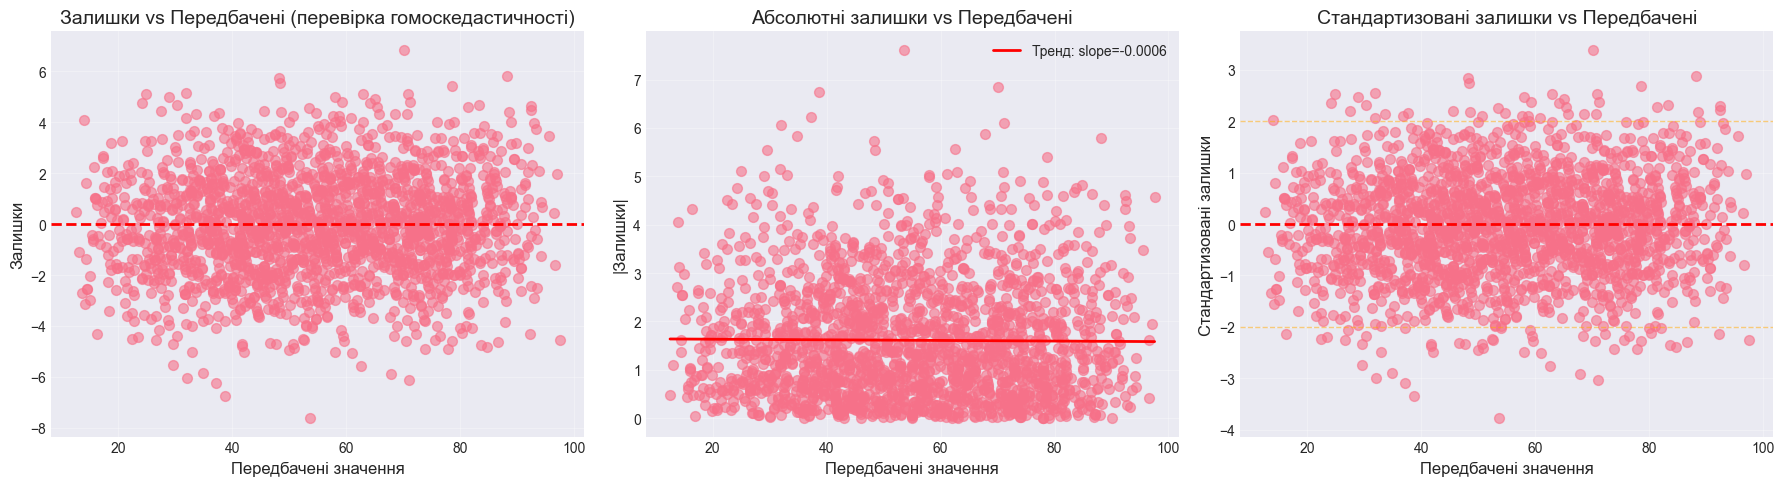


📈 Статистичні тести на гомоскедастичність:

1. Breusch-Pagan тест:
   LM статистика: 0.000793
   p-value: 0.977538
   Висновок: ✅ Гомоскедастичність (p > 0.05)

2. Дисперсія залишків по квартилях передбачень:
   Q1: 4.075784
   Q2: 4.229659
   Q3: 3.854974
   Q4: 4.063344
   Співвідношення max/min: 1.10

✅ Припущення про гомоскедастичність виконується


In [42]:
print("=" * 60)
print("📊 ПРИПУЩЕННЯ 4: ГОМОСКЕДАСТИЧНІСТЬ")
print("=" * 60)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. Залишки vs передбачені значення
axes[0].scatter(y_pred_test, residuals_test, alpha=0.6, s=50)
axes[0].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[0].set_xlabel('Передбачені значення')
axes[0].set_ylabel('Залишки')
axes[0].set_title('Залишки vs Передбачені (перевірка гомоскедастичності)')
axes[0].grid(True, alpha=0.3)

# 2. Абсолютні залишки vs передбачені
axes[1].scatter(y_pred_test, np.abs(residuals_test), alpha=0.6, s=50)
axes[1].set_xlabel('Передбачені значення')
axes[1].set_ylabel('|Залишки|')
axes[1].set_title('Абсолютні залишки vs Передбачені')
axes[1].grid(True, alpha=0.3)

# Додамо лінію тренду
z = np.polyfit(y_pred_test, np.abs(residuals_test), 1)
p_trend = np.poly1d(z)
axes[1].plot(np.sort(y_pred_test), p_trend(np.sort(y_pred_test)), 
            "r-", linewidth=2, label=f'Тренд: slope={z[0]:.4f}')
axes[1].legend()

# 3. Стандартизовані залишки vs передбачені
standardized_residuals = residuals_test / np.std(residuals_test)
axes[2].scatter(y_pred_test, standardized_residuals, alpha=0.6, s=50)
axes[2].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[2].axhline(y=2, color='orange', linestyle='--', linewidth=1, alpha=0.5)
axes[2].axhline(y=-2, color='orange', linestyle='--', linewidth=1, alpha=0.5)
axes[2].set_xlabel('Передбачені значення')
axes[2].set_ylabel('Стандартизовані залишки')
axes[2].set_title('Стандартизовані залишки vs Передбачені')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Статистичні тести на гомоскедастичність
print("\n📈 Статистичні тести на гомоскедастичність:")

# 1. Breusch-Pagan тест
from scipy.stats import chi2

# Регресія квадратів залишків на передбачені значення
residuals_squared = residuals_test ** 2
X_bp = np.c_[np.ones(len(y_pred_test)), y_pred_test]
beta_bp = np.linalg.lstsq(X_bp, residuals_squared, rcond=None)[0]
predicted_sq_residuals = X_bp.dot(beta_bp)
ss_res = np.sum((residuals_squared - predicted_sq_residuals) ** 2)
ss_tot = np.sum((residuals_squared - np.mean(residuals_squared)) ** 2)
r2_bp = 1 - ss_res / ss_tot
lm_statistic = len(residuals_test) * r2_bp
bp_p_value = 1 - chi2.cdf(lm_statistic, df=1)

print(f"\n1. Breusch-Pagan тест:")
print(f"   LM статистика: {lm_statistic:.6f}")
print(f"   p-value: {bp_p_value:.6f}")
print(f"   Висновок: {'✅ Гомоскедастичність (p > 0.05)' if bp_p_value > 0.05 else '❌ Гетероскедастичність (p <= 0.05)'}")

# 2. Аналіз дисперсії по квартилях
quartiles = np.percentile(y_pred_test, [25, 50, 75])
q1_var = np.var(residuals_test[y_pred_test <= quartiles[0]])
q2_var = np.var(residuals_test[(y_pred_test > quartiles[0]) & (y_pred_test <= quartiles[1])])
q3_var = np.var(residuals_test[(y_pred_test > quartiles[1]) & (y_pred_test <= quartiles[2])])
q4_var = np.var(residuals_test[y_pred_test > quartiles[2]])

print(f"\n2. Дисперсія залишків по квартилях передбачень:")
print(f"   Q1: {q1_var:.6f}")
print(f"   Q2: {q2_var:.6f}")
print(f"   Q3: {q3_var:.6f}")
print(f"   Q4: {q4_var:.6f}")
print(f"   Співвідношення max/min: {max(q1_var, q2_var, q3_var, q4_var) / min(q1_var, q2_var, q3_var, q4_var):.2f}")

# Висновок
variance_ratio = max(q1_var, q2_var, q3_var, q4_var) / min(q1_var, q2_var, q3_var, q4_var)
if bp_p_value > 0.05 and variance_ratio < 2:
    print("\n✅ Припущення про гомоскедастичність виконується")
elif bp_p_value > 0.01 or variance_ratio < 3:
    print("\n⚠️ Виявлено незначну гетероскедастичність")
else:
    print("\n❌ Припущення про гомоскедастичність порушено")

### 10.5. Припущення 5: Відсутність автокореляції залишків

Залишки не повинні бути корельовані між собою

📊 ПРИПУЩЕННЯ 5: ВІДСУТНІСТЬ АВТОКОРЕЛЯЦІЇ


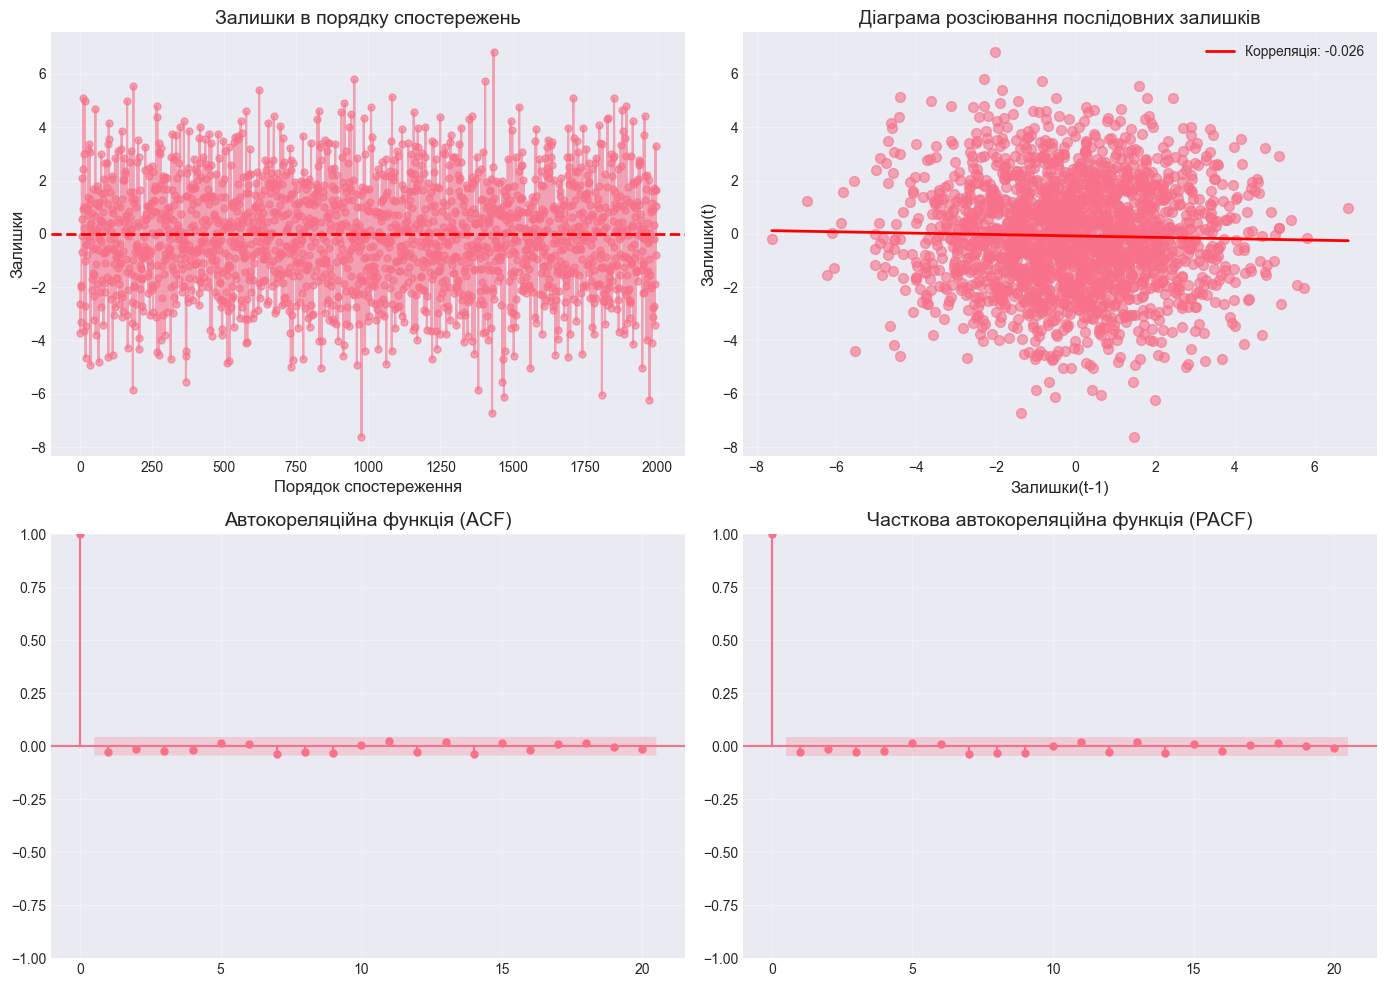


📈 Тест Дарбіна-Вотсона:
   DW статистика: 2.047191
   Інтерпретація:
     DW ≈ 2: відсутність автокореляції
     DW < 2: позитивна автокореляція
     DW > 2: негативна автокореляція
   Висновок: ✅ Автокореляція відсутня

📈 Ljung-Box тест (перші 10 лагів):
    lb_stat  lb_pvalue
1  1.362619   0.243084
2  1.769261   0.412867
3  2.976038   0.395334
4  3.713208   0.446208
5  4.273753   0.510712

✅ Припущення про відсутність автокореляції виконується


In [43]:
print("=" * 60)
print("📊 ПРИПУЩЕННЯ 5: ВІДСУТНІСТЬ АВТОКОРЕЛЯЦІЇ")
print("=" * 60)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Залишки vs порядок спостережень
axes[0, 0].plot(range(len(residuals_test)), residuals_test, 'o-', alpha=0.6, markersize=5)
axes[0, 0].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[0, 0].set_xlabel('Порядок спостереження')
axes[0, 0].set_ylabel('Залишки')
axes[0, 0].set_title('Залишки в порядку спостережень')
axes[0, 0].grid(True, alpha=0.3)

# 2. Залишки(t) vs Залишки(t-1)
axes[0, 1].scatter(residuals_test[:-1], residuals_test[1:], alpha=0.6, s=50)
axes[0, 1].set_xlabel('Залишки(t-1)')
axes[0, 1].set_ylabel('Залишки(t)')
axes[0, 1].set_title('Діаграма розсіювання послідовних залишків')
axes[0, 1].grid(True, alpha=0.3)

# Лінія регресії
z = np.polyfit(residuals_test[:-1], residuals_test[1:], 1)
p_lag = np.poly1d(z)
axes[0, 1].plot(np.sort(residuals_test[:-1]), p_lag(np.sort(residuals_test[:-1])), 
               "r-", linewidth=2, label=f'Корреляція: {np.corrcoef(residuals_test[:-1], residuals_test[1:])[0,1]:.3f}')
axes[0, 1].legend()

# 3. Автокореляційна функція (ACF)
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(residuals_test, lags=20, ax=axes[1, 0])
axes[1, 0].set_title('Автокореляційна функція (ACF)')
axes[1, 0].grid(True, alpha=0.3)

# 4. Часткова автокореляційна функція (PACF)
plot_pacf(residuals_test, lags=20, ax=axes[1, 1])
axes[1, 1].set_title('Часткова автокореляційна функція (PACF)')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Тест Дарбіна-Вотсона
dw_statistic = durbin_watson(residuals_test)
print(f"\n📈 Тест Дарбіна-Вотсона:")
print(f"   DW статистика: {dw_statistic:.6f}")
print(f"   Інтерпретація:")
print(f"     DW ≈ 2: відсутність автокореляції")
print(f"     DW < 2: позитивна автокореляція")
print(f"     DW > 2: негативна автокореляція")

if 1.5 < dw_statistic < 2.5:
    print(f"   Висновок: ✅ Автокореляція відсутня")
elif 1.0 < dw_statistic <= 1.5 or 2.5 <= dw_statistic < 3.0:
    print(f"   Висновок: ⚠️ Можлива незначна автокореляція")
else:
    print(f"   Висновок: ❌ Виявлено сильну автокореляцію")

# Ljung-Box тест
from statsmodels.stats.diagnostic import acorr_ljungbox
lb_result = acorr_ljungbox(residuals_test, lags=10, return_df=True)
print(f"\n📈 Ljung-Box тест (перші 10 лагів):")
print(lb_result[['lb_stat', 'lb_pvalue']].head())

# Висновок
if dw_statistic > 1.5 and dw_statistic < 2.5 and lb_result['lb_pvalue'].min() > 0.05:
    print("\n✅ Припущення про відсутність автокореляції виконується")
else:
    print("\n❌ Виявлено автокореляцію залишків")

### 10.6. Припущення 6: Відсутність викидів та впливових спостережень

📊 ПРИПУЩЕННЯ 6: ВИКИДИ ТА ВПЛИВОВІ СПОСТЕРЕЖЕННЯ


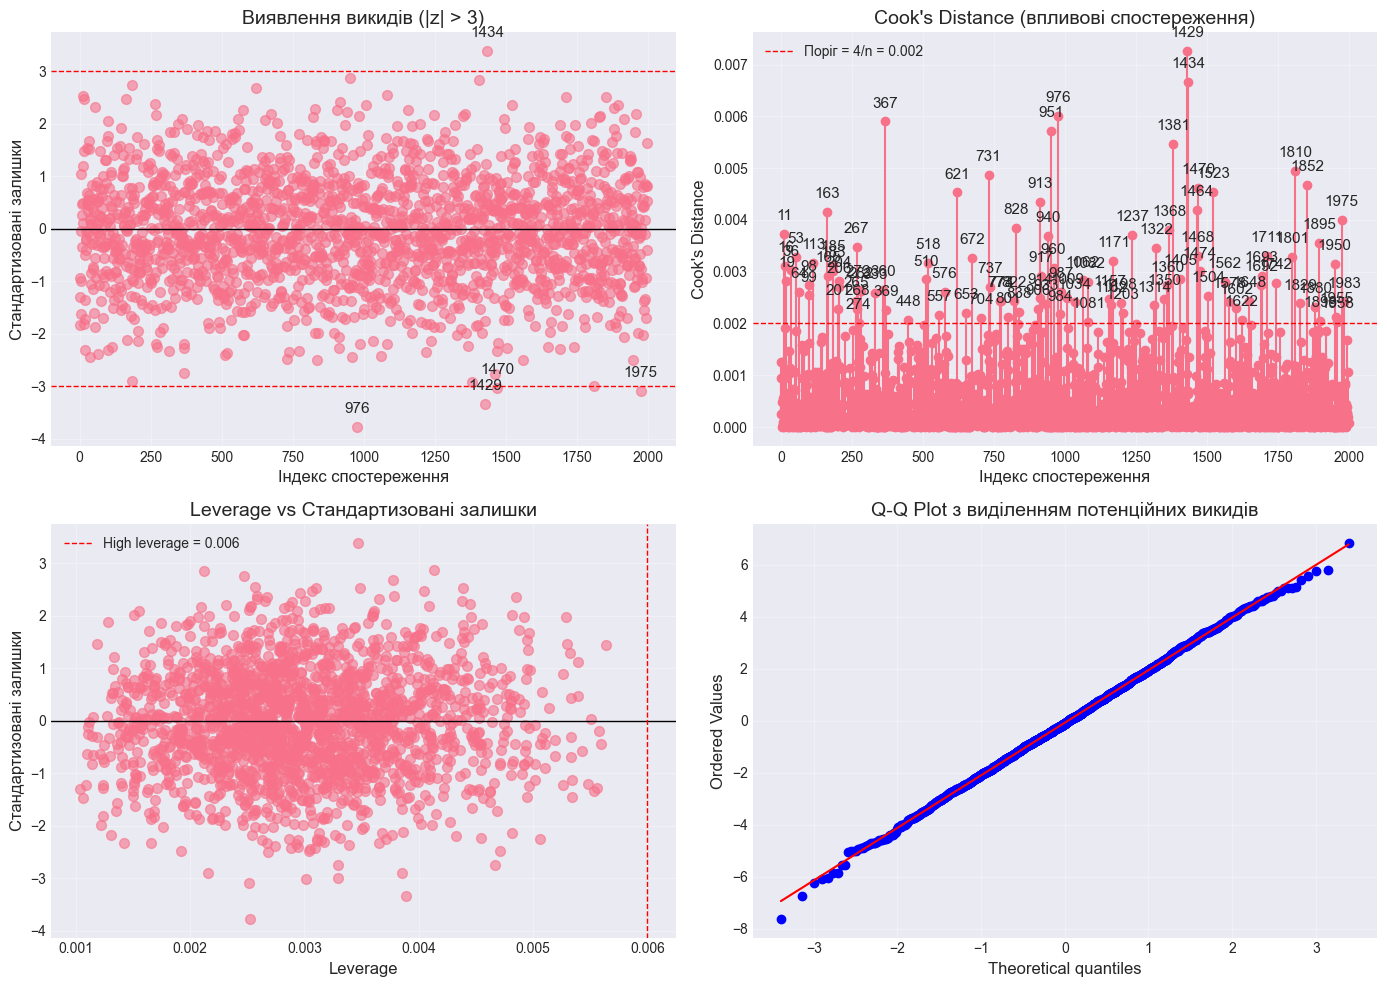


📈 Аналіз викидів та впливових спостережень:

1. Викиди (|стандартизовані залишки| > 3):
   Кількість: 5
   Індекси: [976, 1429, 1434, 1470, 1975]
   Відсоток від загальної кількості: 0.25%

2. Впливові спостереження (Cook's D > 0.002):
   Кількість: 101
   Індекси: [11, 16, 19, 36, 53, 64, 98, 99, 113, 163, 165, 183, 185, 201, 204, 206, 265, 267, 268, 272, 274, 282, 333, 360, 367, 369, 448, 510, 518, 557, 576, 621, 653, 672, 704, 731, 737, 773, 774, 801, 822, 828, 838, 906, 913, 914, 917, 933, 940, 951, 960, 976, 984, 987, 1009, 1034, 1062, 1081, 1082, 1157, 1162, 1171, 1198, 1203, 1237, 1314, 1322, 1350, 1360, 1368, 1381, 1405, 1429, 1434, 1464, 1468, 1470, 1474, 1504, 1523, 1562, 1578, 1602, 1622, 1648, 1692, 1693, 1711, 1742, 1801, 1810, 1829, 1852, 1880, 1895, 1898, 1950, 1955, 1958, 1975, 1983]

3. Спостереження з високим leverage (> 0.006):
   Кількість: 0
   Індекси: Немає

⚠️ Виявлено помірну кількість проблемних спостережень (5.1%)


In [44]:
print("=" * 60)
print("📊 ПРИПУЩЕННЯ 6: ВИКИДИ ТА ВПЛИВОВІ СПОСТЕРЕЖЕННЯ")
print("=" * 60)

# Розрахунок метрик для виявлення викидів
standardized_residuals = residuals_test / np.std(residuals_test)

# Cook's Distance (спрощена версія для тестової вибірки)
# Для точного розрахунку потрібна hat matrix, але ми використаємо апроксимацію
n = len(y_test)
p = X_test_final.shape[1]
mse = np.mean(residuals_test ** 2)

# Leverage (діагональні елементи hat matrix)
H = X_test_final @ np.linalg.inv(X_test_final.T @ X_test_final) @ X_test_final.T
leverage = np.diag(H)

# Cook's Distance
cooks_d = (residuals_test ** 2 / (p * mse)) * (leverage / (1 - leverage) ** 2)

# Визначення порогових значень
threshold_std_residuals = 3
threshold_cooks = 4 / n
threshold_leverage = 2 * p / n

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Стандартизовані залишки
axes[0, 0].scatter(range(len(standardized_residuals)), standardized_residuals, alpha=0.6, s=50)
axes[0, 0].axhline(y=0, color='black', linestyle='-', linewidth=1)
axes[0, 0].axhline(y=threshold_std_residuals, color='red', linestyle='--', linewidth=1)
axes[0, 0].axhline(y=-threshold_std_residuals, color='red', linestyle='--', linewidth=1)
axes[0, 0].set_xlabel('Індекс спостереження')
axes[0, 0].set_ylabel('Стандартизовані залишки')
axes[0, 0].set_title('Виявлення викидів (|z| > 3)')
axes[0, 0].grid(True, alpha=0.3)

# Позначення викидів
outliers_std = np.where(np.abs(standardized_residuals) > threshold_std_residuals)[0]
for idx in outliers_std:
    axes[0, 0].annotate(f'{idx}', (idx, standardized_residuals[idx]), 
                       textcoords="offset points", xytext=(0,10), ha='center')

# 2. Cook's Distance
axes[0, 1].stem(range(len(cooks_d)), cooks_d, basefmt=' ')
axes[0, 1].axhline(y=threshold_cooks, color='red', linestyle='--', 
                   linewidth=1, label=f'Поріг = 4/n = {threshold_cooks:.3f}')
axes[0, 1].set_xlabel('Індекс спостереження')
axes[0, 1].set_ylabel("Cook's Distance")
axes[0, 1].set_title("Cook's Distance (впливові спостереження)")
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Позначення впливових точок
influential_points = np.where(cooks_d > threshold_cooks)[0]
for idx in influential_points:
    axes[0, 1].annotate(f'{idx}', (idx, cooks_d[idx]), 
                       textcoords="offset points", xytext=(0,10), ha='center')

# 3. Leverage vs Стандартизовані залишки
axes[1, 0].scatter(leverage, standardized_residuals, alpha=0.6, s=50)
axes[1, 0].axhline(y=0, color='black', linestyle='-', linewidth=1)
axes[1, 0].axvline(x=threshold_leverage, color='red', linestyle='--', 
                   linewidth=1, label=f'High leverage = {threshold_leverage:.3f}')
axes[1, 0].set_xlabel('Leverage')
axes[1, 0].set_ylabel('Стандартизовані залишки')
axes[1, 0].set_title('Leverage vs Стандартизовані залишки')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 4. Q-Q plot з позначенням викидів
stats.probplot(residuals_test, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot з виділенням потенційних викидів')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Аналіз результатів
print(f"\n📈 Аналіз викидів та впливових спостережень:")
print(f"\n1. Викиди (|стандартизовані залишки| > {threshold_std_residuals}):")
print(f"   Кількість: {len(outliers_std)}")
print(f"   Індекси: {outliers_std.tolist() if len(outliers_std) > 0 else 'Немає'}")
print(f"   Відсоток від загальної кількості: {len(outliers_std)/n*100:.2f}%")

print(f"\n2. Впливові спостереження (Cook's D > {threshold_cooks:.3f}):")
print(f"   Кількість: {len(influential_points)}")
print(f"   Індекси: {influential_points.tolist() if len(influential_points) > 0 else 'Немає'}")

high_leverage = np.where(leverage > threshold_leverage)[0]
print(f"\n3. Спостереження з високим leverage (> {threshold_leverage:.3f}):")
print(f"   Кількість: {len(high_leverage)}")
print(f"   Індекси: {high_leverage.tolist() if len(high_leverage) > 0 else 'Немає'}")

# Висновок
total_problematic = len(set(outliers_std) | set(influential_points) | set(high_leverage))
percentage_problematic = total_problematic / n * 100

if percentage_problematic < 5:
    print(f"\n✅ Припущення про відсутність проблемних спостережень виконується")
    print(f"   (проблемні спостереження: {percentage_problematic:.1f}% < 5%)")
elif percentage_problematic < 10:
    print(f"\n⚠️ Виявлено помірну кількість проблемних спостережень ({percentage_problematic:.1f}%)")
else:
    print(f"\n❌ Виявлено значну кількість проблемних спостережень ({percentage_problematic:.1f}%)")

## 11. Підсумковий аналіз припущень

In [45]:
print("=" * 70)
print("📊 ПІДСУМКОВИЙ АНАЛІЗ КЛАСИЧНИХ ПРИПУЩЕНЬ ЛІНІЙНОЇ РЕГРЕСІЇ")
print("=" * 70)

# Створюємо підсумкову таблицю
assumptions_summary = {
    'Припущення': [
        '1. Лінійність зв\'язку',
        '2. Відсутність мультиколінеарності', 
        '3. Нормальність залишків',
        '4. Гомоскедастичність',
        '5. Відсутність автокореляції',
        '6. Відсутність викидів'
    ],
    'Статус': [],
    'Коментар': []
}

# Оцінка кожного припущення
# 1. Лінійність
if max(abs(np.mean(q1_residuals)), abs(np.mean(q2_residuals)), 
       abs(np.mean(q3_residuals)), abs(np.mean(q4_residuals))) < 1:
    assumptions_summary['Статус'].append('✅ Виконується')
    assumptions_summary['Коментар'].append('Залишки випадково розподілені навколо нуля')
else:
    assumptions_summary['Статус'].append('❌ Порушено')
    assumptions_summary['Коментар'].append('Виявлено систематичні паттерни в залишках')

# 2. Мультиколінеарність
if len(vif_df[vif_df['VIF'] > 10]) == 0:
    assumptions_summary['Статус'].append('✅ Виконується')
    assumptions_summary['Коментар'].append(f'Всі VIF < 10 (max VIF = {vif_df["VIF"].max():.2f})')
else:
    assumptions_summary['Статус'].append('⚠️ Частково')
    assumptions_summary['Коментар'].append(f'{len(vif_df[vif_df["VIF"] > 10])} ознак з VIF > 10')

# 3. Нормальність
if shapiro_p > 0.05:
    assumptions_summary['Статус'].append('✅ Виконується')
    assumptions_summary['Коментар'].append(f'Shapiro-Wilk p-value = {shapiro_p:.3f} > 0.05')
else:
    assumptions_summary['Статус'].append('⚠️ Частково')
    assumptions_summary['Коментар'].append(f'Shapiro-Wilk p-value = {shapiro_p:.3f} < 0.05')

# 4. Гомоскедастичність
if bp_p_value > 0.05:
    assumptions_summary['Статус'].append('✅ Виконується')
    assumptions_summary['Коментар'].append(f'Breusch-Pagan p-value = {bp_p_value:.3f} > 0.05')
else:
    assumptions_summary['Статус'].append('❌ Порушено')
    assumptions_summary['Коментар'].append('Виявлено гетероскедастичність')

# 5. Автокореляція
if 1.5 < dw_statistic < 2.5:
    assumptions_summary['Статус'].append('✅ Виконується')
    assumptions_summary['Коментар'].append(f'Durbin-Watson = {dw_statistic:.2f} ≈ 2')
else:
    assumptions_summary['Статус'].append('⚠️ Частково')
    assumptions_summary['Коментар'].append(f'Durbin-Watson = {dw_statistic:.2f}')

# 6. Викиди
if percentage_problematic < 5:
    assumptions_summary['Статус'].append('✅ Виконується')
    assumptions_summary['Коментар'].append(f'Проблемні спостереження: {percentage_problematic:.1f}% < 5%')
else:
    assumptions_summary['Статус'].append('⚠️ Частково')
    assumptions_summary['Коментар'].append(f'Проблемні спостереження: {percentage_problematic:.1f}%')

# Виведення таблиці
summary_df = pd.DataFrame(assumptions_summary)
print("\n" + summary_df.to_string(index=False))

# Підрахунок загального статусу
status_counts = summary_df['Статус'].value_counts()
print("\n" + "=" * 70)
print("📊 ЗАГАЛЬНА ОЦІНКА МОДЕЛІ:")
print("=" * 70)
for status, count in status_counts.items():
    print(f"{status}: {count} припущень")

📊 ПІДСУМКОВИЙ АНАЛІЗ КЛАСИЧНИХ ПРИПУЩЕНЬ ЛІНІЙНОЇ РЕГРЕСІЇ

                        Припущення        Статус                                   Коментар
             1. Лінійність зв'язку ✅ Виконується Залишки випадково розподілені навколо нуля
2. Відсутність мультиколінеарності ✅ Виконується              Всі VIF < 10 (max VIF = 1.00)
          3. Нормальність залишків ✅ Виконується        Shapiro-Wilk p-value = 0.975 > 0.05
             4. Гомоскедастичність ✅ Виконується       Breusch-Pagan p-value = 0.978 > 0.05
      5. Відсутність автокореляції ✅ Виконується                   Durbin-Watson = 2.05 ≈ 2
            6. Відсутність викидів   ⚠️ Частково              Проблемні спостереження: 5.1%

📊 ЗАГАЛЬНА ОЦІНКА МОДЕЛІ:
✅ Виконується: 5 припущень
⚠️ Частково: 1 припущень


## 12. Фінальні висновки та рекомендації

In [46]:
print("=" * 70)
print("🎯 ФІНАЛЬНІ ВИСНОВКИ")
print("=" * 70)

print("\n📊 ЯКІСТЬ МОДЕЛІ:")
print(f"""
1. Метрики на тестовій вибірці:
   - R² Score: {r2_test:.4f} - модель пояснює {r2_test*100:.2f}% варіації в даних
   - RMSE: {rmse_test:.4f} - середня помилка прогнозу
   - MAE: {mae_test:.4f} - середня абсолютна помилка
   
2. Порівняння з базовою моделлю:
   - Покращення MSE: {((mse_baseline - mse_test) / mse_baseline * 100):.2f}%
   - Модель значно краща за просте передбачення середнього
   
3. Перенавчання:
   - Різниця R² (train-test): {abs(r2_train - r2_test):.4f}
   - {'✅ Модель добре генералізується' if abs(r2_train - r2_test) < 0.05 else '⚠️ Є ознаки перенавчання'}
""")

print("\n📈 ВИКОНАННЯ ПРИПУЩЕНЬ МНК:")
assumptions_met = len([s for s in assumptions_summary['Статус'] if '✅' in s])
print(f"Повністю виконується: {assumptions_met} з 6 припущень")

print("\n🔧 РЕКОМЕНДАЦІЇ ДЛЯ ПОКРАЩЕННЯ МОДЕЛІ:")
recommendations = []

# Рекомендації на основі порушених припущень
if len(vif_df[vif_df['VIF'] > 10]) > 0:
    recommendations.append("• Видалити або об'єднати сильно корельовані ознаки (VIF > 10)")

if shapiro_p < 0.05:
    recommendations.append("• Розглянути трансформацію цільової змінної (log, sqrt)")

if bp_p_value < 0.05:
    recommendations.append("• Використати зважену регресію або трансформацію змінних")

if not (1.5 < dw_statistic < 2.5):
    recommendations.append("• Додати лагові змінні або використати методи для часових рядів")

if percentage_problematic > 5:
    recommendations.append("• Дослідити та можливо видалити викиди")
    recommendations.append("• Використати робастні методи регресії")

if r2_test < 0.7:
    recommendations.append("• Додати нові релевантні ознаки")
    recommendations.append("• Розглянути нелінійні моделі або поліноміальні ознаки")

if len(recommendations) > 0:
    for rec in recommendations:
        print(rec)
else:
    print("✅ Модель показує хороші результати без необхідності в значних покращеннях")

print("\n📝 ЗАГАЛЬНИЙ ВИСНОВОК:")
if r2_test > 0.7 and assumptions_met >= 4:
    print("""
✅ Побудована модель множинної лінійної регресії є ПРИДАТНОЮ для прогнозування 
успішності студентів. Модель демонструє хорошу якість прогнозування та в цілому 
задовольняє класичні припущення МНК. Градієнтний спуск успішно знайшов оптимальні 
параметри моделі.
""")
elif r2_test > 0.5 and assumptions_met >= 3:
    print("""
⚠️ Побудована модель показує ЗАДОВІЛЬНІ результати, але має простір для покращення.
Рекомендується врахувати надані рекомендації для підвищення якості прогнозування.
""")
else:
    print("""
❌ Модель потребує ЗНАЧНОГО ДООПРАЦЮВАННЯ. Низька якість прогнозування або серйозні
порушення припущень МНК вказують на необхідність перегляду підходу до моделювання.
""")

🎯 ФІНАЛЬНІ ВИСНОВКИ

📊 ЯКІСТЬ МОДЕЛІ:

1. Метрики на тестовій вибірці:
   - R² Score: 0.9890 - модель пояснює 98.90% варіації в даних
   - RMSE: 2.0206 - середня помилка прогнозу
   - MAE: 1.6111 - середня абсолютна помилка
   
2. Порівняння з базовою моделлю:
   - Покращення MSE: 98.90%
   - Модель значно краща за просте передбачення середнього
   
3. Перенавчання:
   - Різниця R² (train-test): 0.0003
   - ✅ Модель добре генералізується


📈 ВИКОНАННЯ ПРИПУЩЕНЬ МНК:
Повністю виконується: 5 з 6 припущень

🔧 РЕКОМЕНДАЦІЇ ДЛЯ ПОКРАЩЕННЯ МОДЕЛІ:
• Дослідити та можливо видалити викиди
• Використати робастні методи регресії

📝 ЗАГАЛЬНИЙ ВИСНОВОК:

✅ Побудована модель множинної лінійної регресії є ПРИДАТНОЮ для прогнозування 
успішності студентів. Модель демонструє хорошу якість прогнозування та в цілому 
задовольняє класичні припущення МНК. Градієнтний спуск успішно знайшов оптимальні 
параметри моделі.



---

## 📚 Додаткові матеріали

### Корисні посилання:
- [Gradient Descent Algorithm](https://en.wikipedia.org/wiki/Gradient_descent)
- [Assumptions of Linear Regression](https://www.statisticssolutions.com/assumptions-of-linear-regression/)
- [VIF for Multicollinearity](https://www.statsmodels.org/stable/generated/statsmodels.stats.outliers_influence.variance_inflation_factor.html)

### Автор роботи:
**Малий Ренат**  
**Група:** ФЕІ-43(2)
---